In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from random import expovariate, betavariate
from matplotlib.pyplot import cm

#### Question 1: 
*Generate 1000 uniform random numbers between [0,1] using the python module random or numpy.random .Plot these random numbers with histograms with even bin size 0.2.*
 

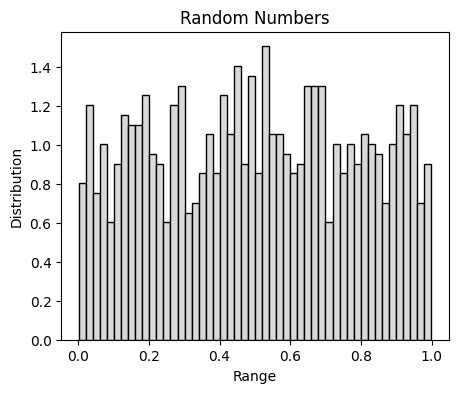

In [2]:
N = 1000
X = np.linspace(1,1000,N)
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.random()


plt.figure(figsize=(5,4))
bins = 50
plt.xlabel("Range")
plt.ylabel("Distribution")
plt.title("Random Numbers")
plt.hist(Dist, bins, density=True, edgecolor = 'black',color=['0.85'])
plt.show()

#### Question 2: 
*Generate 1000 uniform random integers between [1, 1000] using the python module random or numpy.random . Plot these random numbers with histograms with even bin size 0.2.*
 

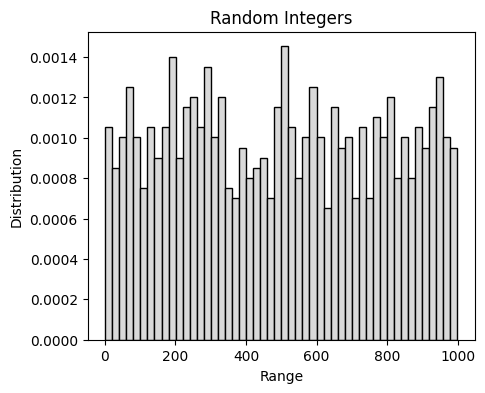

In [3]:
N = 1000
X = np.linspace(1,1000,N)
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.randint(1,1000)


plt.figure(figsize=(5,4))
bins = 50
plt.xlabel("Range")
plt.ylabel("Distribution")
plt.title("Random Integers")
plt.hist(Dist, bins, density=True, edgecolor='black',color='0.85')
plt.show()

#### Question 3: 
*Generate 1000 uniform random integers. Get the mean and median of these numbers*
 

In [4]:
N = 1000
lower_limit, upper_limit = 1, 100
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.randint(1,100)


def Mean_Median(X: list) ->list:
    Mean = np.sum(X)/len(X)
    
    Sorted_X = np.sort(X)
    if len(X)%2 != 1:
        Median = Sorted_X[(len(X)//2)-1]
    else:
        Median = Sorted_X[(len(X)/2)]    

    return [Mean, Median]

mean, median = Mean_Median(Dist)
print("The Mean of the Integers is: ",mean)
print("The Median of the Integers is: ",median)


The Mean of the Integers is:  49.038
The Median of the Integers is:  49.0


#### Question 4.
*Generate N uniform random numbers $X = \left[x_0, x_1, ...., x_N−1 \right]$ between [a, b]. Write a program to obtain the distribution of X with 
$Bins =\left[ min(X), min(X) + dx, min(x) + 2x, ...., max(X)\right]$. Choose N = 5000, a = −1.3, b = 1.3 and dx = 0.05*

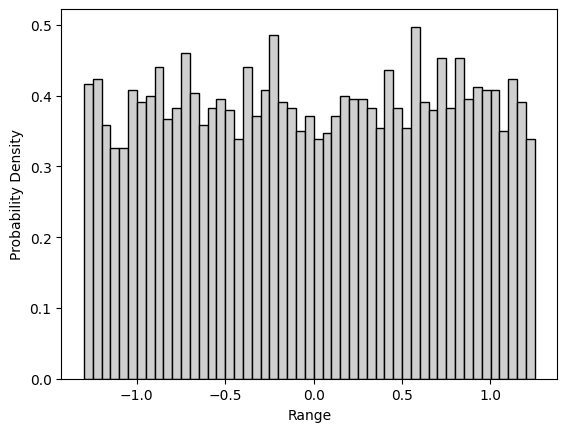

In [5]:
N = 5000
a, b, dx = -1.3, 1.3, 0.05
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.uniform(a,b)

bins = [min(Dist)] 

i = 1   
while True:
    while bins[i-1]+dx <= max(Dist):
        bins.append(bins[i-1]+dx)
        i+=1
    else:
        break

plt.xlabel("Range")
plt.ylabel("Probability Density")        
plt.hist(Dist, bins, density= True, edgecolor='black',color = ['0.81'])
plt.show()    


#### Question 6.
*Perform a numerical experiment of coin toss to show that, for very large number of trials, the probability of obtaining head is $\frac{1}{2}$.*

In [6]:
#Number of trials
Trials = 10e6
#array to store head
Heads = []

for i in range(int(Trials)):
    if np.random.random()<0.5:
        Heads.append([1])

print("The Probability of getting Head from an unbiased coin is: {:0.2f}% which is approximately 50%.".format((len(Heads)/Trials)*100))

The Probability of getting Head from an unbiased coin is: 49.99% which is approximately 50%.


#### Question 7.
In a box there is 5 red and 7 white balls.
* One ball is taken out of the box randomly. Get the probability of obtaining the ball as red, with
simulation.
* two balls are taken randomly. Obtain the probability of obtaining \
i. both the ball as red, with simulation.\
ii. one ball red and another ball white, with simulation.

In [162]:
# Define the box
box = ['red']*5 + ['white']*7
# Define the number of simulations
num_simulations = 10e5

#1.
# Initialize counters
red_count = 0
red_balls = 0
white_balls = 0
composite_balls = 0

# Run the simulations
for _ in range(int(num_simulations)):
    ball = np.random.choice(box)
    if ball == 'red':
        red_count += 1
    
    sample = box.copy()
    ball_1 = np.random.choice(sample)
    if ball_1 == 'red':
        sample.remove('red')
        ball_2 = np.random.choice(sample)
        if ball_2 == 'red':
            red_balls +=1
    else:
        sample.remove('white')
        ball_2 = np.random.choice(sample)
        if ball_2 == 'red':
            composite_balls +=1
        else:
            white_balls +=1    


print("The simulated probability of drawing a red ball is {:0.2f}%.".format((red_count / num_simulations)*100))
print("\nDrawing of two balls without substitution")
print("------------------------------------------")
print("The Probability of both balls being red is: {:0.2f}%".format((red_balls/num_simulations)*100))
print("TheProbability of both balls being white is: {:0.2f}%".format((white_balls/num_simulations)*100))  
print("The Probability of one ball being red and another being white is: {:0.2f}%".format((composite_balls/num_simulations)*100))      



The simulated probability of drawing a red ball is 41.67%.

Drawing of two balls without substitution
------------------------------------------
The Probability of both balls being red is: 15.19%
TheProbability of both balls being white is: 31.82%
The Probability of one ball being red and another being white is: 26.54%


#### Question 8.

Two dices are thrown. Obtain the probability of getting the\
(a) point 3 on both of the dices, with simulation.\
(b) sum of the points on the dices as 7, with simulation.\
(c) point 3 on first dice and point 4 on second dice, with simulation

In [158]:
ensembles = int(10e4)

die = ['1','2','3','4','5','6']

def Probability(die: list , ensembles: int)->None:

    dots_33 = 0      #counter to detect the both 3 scenario
    sum_7 = 0       #counter to detect the sum 7 scenario
    dots_34 = 0     #counter to detect the point 3 on first dice and point 4 on second dice
    MacroState = [] 
    for i in range(ensembles):      #Tossing ensemble of dices

        a, b = np.random.choice(die), np.random.choice(die)     #Tossing two dices

        if a == '3' and b == '3':       #point 3 on both of the dices, with simulation
            dots_33 += 1

        if int(a)+int(b) == 7:          #sum of the points on the dices as 7, with simulation.
            state = [a, b]
            if MacroState.count(state) == 0 : MacroState.append(state)   
            sum_7 +=1

        if int(a) == 3 and int(b )== 4: #point 3 on first dice and point 4 on second dice, with simulation
            dots_34 +=1

    print('The Probability of getting 3 on both dices is: {:0.3f}%'.format((dots_33/ensembles)*100))
    print('\nThe Probability of getting the sum of the points on the dices as 7 is: {:0.3f}% \n and the possible Microstates are:\n {} '.format((sum_7/ensembles)*100,MacroState))
    print('\nThe Probability of getting 3 on first die and 4 on the second die is: {:0.3f}%'.format((dots_34/ensembles)*100))


Probability(die, ensembles)


The Probability of getting 3 on both dices is: 2.720%

The Probability of getting the sum of the points on the dices as 7 is: 16.519% 
 and the possible Microstates are:
 [['2', '5'], ['6', '1'], ['3', '4'], ['4', '3'], ['5', '2'], ['1', '6']] 

The Probability of getting 3 on first die and 4 on the second die is: 2.656%


#### Question 9.

Binomial Distribution\
Simulate a coin toss experiment N times. Obtain the probabilities of obtaining head in n=1,2,...,N trial. Plot the probabilites respect to n. Compare the results with $${N \choose n} \left(\frac{1}{2}\right)^n \left(\frac{1}{2}\right)^{N-n}$$
Take N = 10 first. Now increase N to show that the probability distribution converges to the Gaussian distribution.

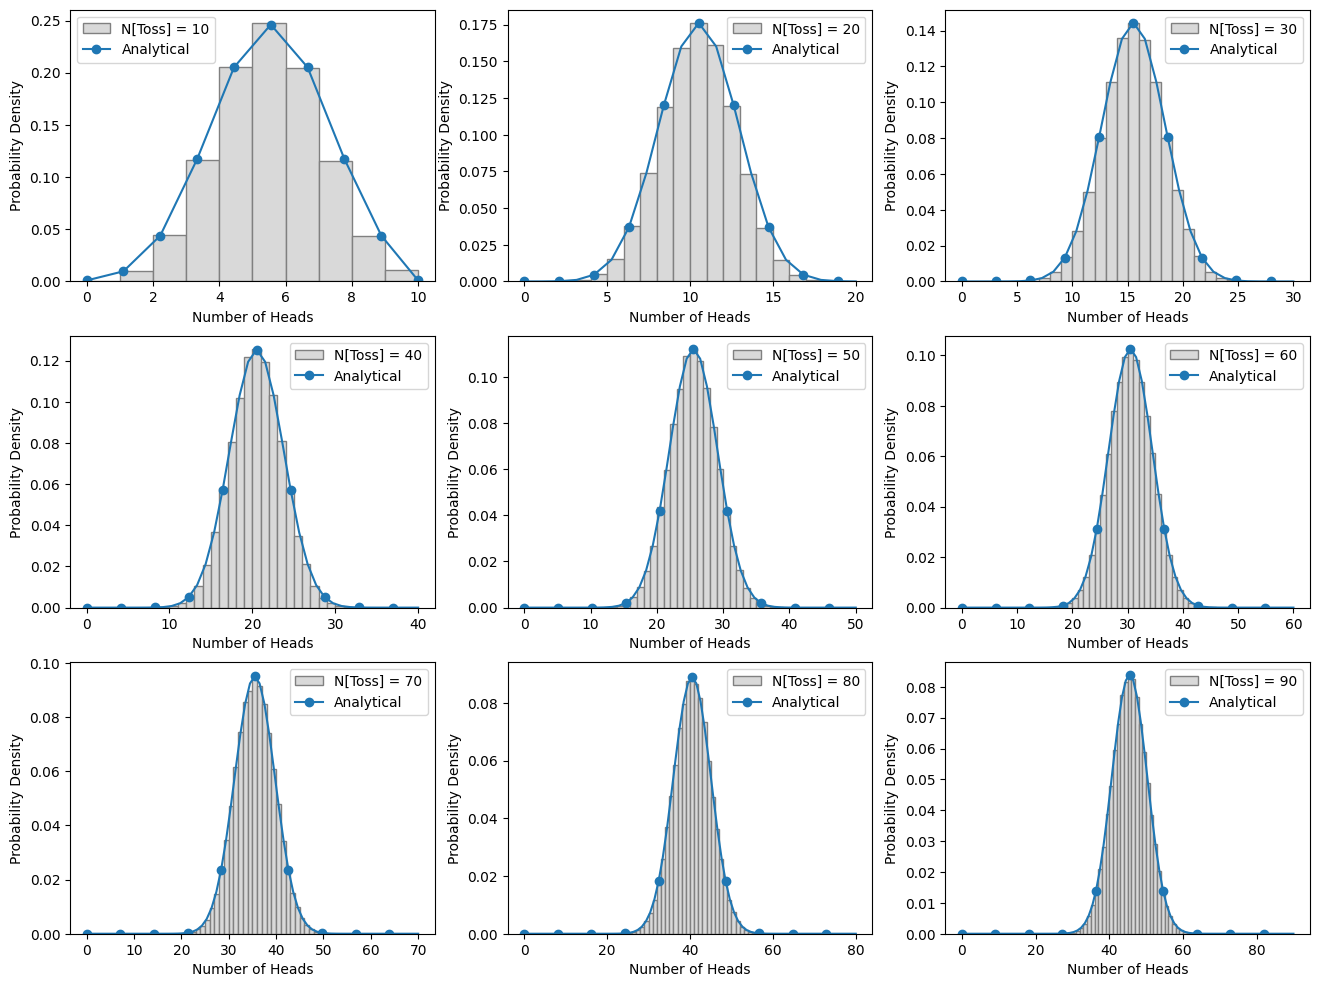

In [9]:
#Number of Ensembles
Num_ensemble = int(10e4)

def Bernouli_Distribution(n: int):

    plt.figure(figsize=(16,12))

    for k in range(1,n+1):
        N = 10*k        #Number of Toss
        #array to store head
        outcome = np.zeros(Num_ensemble, dtype=int)

        for i in range(Num_ensemble):       #Tossing an ensemble of coins
            heads = 0
            for _ in range(N):              #For tossing each coin N times
                if np.random.random()<0.5:  #Tossing of the coin if the random number is <0.5 then head else tails
                    heads +=1
            outcome[i] = heads


        def analytical(N: int)->list:
            '''Theoretical outcome of tossing a coin N times'''
            X = np.linspace(0,N,N)              # X-axis for analytical values
            Y = np.zeros_like(X)                # Analytical Values
            for i in range(len(X)):
                Y[i] = comb(N,int(X[i]))*((1/2)**X[i])*(1/2)**(N-X[i]) 
            return X, Y
        X,Y = analytical(N)


        #Plotting of the Distribution
        if n%3 != 0:
            plots = int(n//3 + 1)
        else: 
            plots = int(n//3)    
        plt.subplot(plots,3,k) 
        plt.ylabel('Probability Density')
        plt.xlabel("Number of Heads")
        plt.hist(outcome,bins=[i for i in range(N+1)], density=True, label='N[Toss] = {}'.format(N),
                histtype='bar', color=['0.85'], edgecolor='grey')  
        plt.plot(X,Y, label='Analytical',marker='o', markevery=int(N/10))
        plt.legend(loc='best')
    plt.show() 

Bernouli_Distribution(9)    

#### Question 10

btain a set of N = 5000 number of \
(a) Gaussian variate random numbers using the module random.gauss \
(b) exponential variate random numbers using the module random.expovariate \
(c) beta variate random numbers using the module random.betavariate


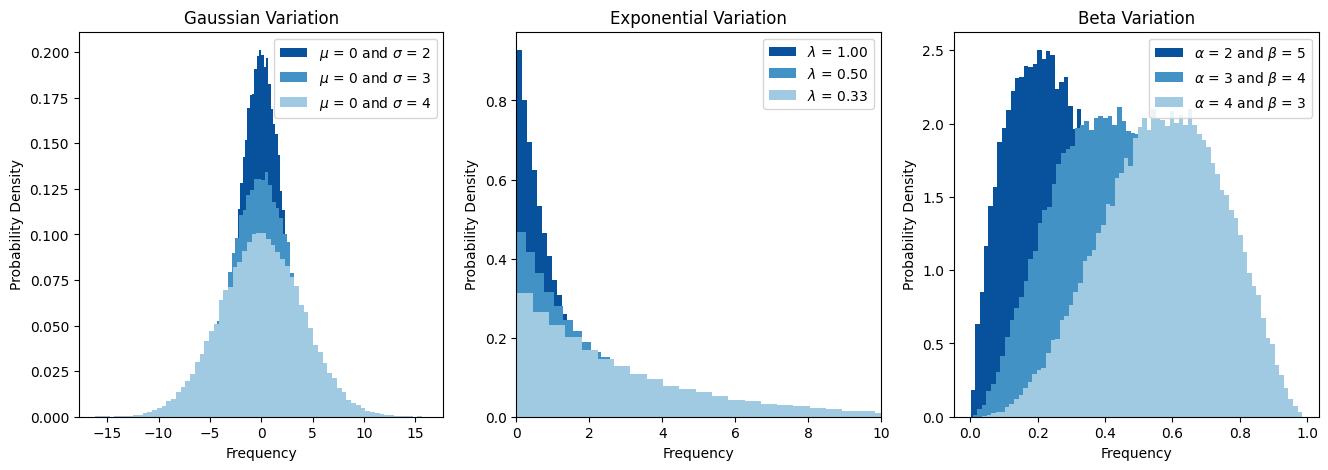

In [19]:
N = 50000   #Number of ensembles
n = 3       #Number of Variations

plt.figure(figsize=(16,5))

def Gaussian_Variate(mu: float, sigma:float, N: int)-> list:
    #Function to create an array of Random numbers obeying Normal Distribution

    parameters = [mu, sigma]
    Gaussian = [np.random.normal(mu, sigma) for _ in range(N)]
    return [Gaussian, parameters]

def Exponential_Variate(mu: float, N: int)-> list:
    #Function to create an array of Random numbers obeying Exponential Function Distribution

    lamda = 1.0/mu
    parameters = [lamda]
    ExpoVariate = [expovariate(lamda) for _ in range(N)]
    return [ExpoVariate, parameters]

def Beta_Variate(alpha: float, beta: int, N:int)-> list:
    #Function to create an array of Random numbers obeying Beta function Distribution

    parameters = [alpha, beta]
    BetaVariate = [betavariate(alpha, beta) for _ in range(N)]
    return [BetaVariate, parameters]

#Empty array to store the random numbers
Gaussian = np.zeros((n,2), dtype=object)
ExpoVariate = np.zeros_like(Gaussian)
BetaVariate = np.zeros_like(Gaussian)

for i in range(n):
    #Recursing to obtain a set Random numbers with different parameters

    Gaussian[i][0], Gaussian[i][1] = Gaussian_Variate(0, i + 2, N)
    ExpoVariate[i][0], ExpoVariate[i][1] = Exponential_Variate(i + 1, N)
    BetaVariate[i][0], BetaVariate[i][1] = Beta_Variate(i + 2, 5 - i, N)
    


#For Plotting
cmap = plt.get_cmap('Blues_r')

for i in range(n):
    plt.subplot(131)
    plt.title("Gaussian Variation")
    plt.xlabel('Frequency')
    plt.ylabel('Probability Density')
    plt.hist(Gaussian[i][0], density=True, color=cmap(0.25 * (i + 0.5)), stacked=True, bins=70,
             label=r'$\mu$ = {} and $\sigma$ = {}'.format(Gaussian[i, 1][0], Gaussian[i, 1][1]))
    plt.legend(loc='best')
    plt.subplot(132)
    plt.title("Exponential Variation")
    plt.xlabel('Frequency')
    plt.ylabel('Probability Density')
    plt.xlim(0,10)
    plt.hist(ExpoVariate[i][0], density=True, color=cmap(0.25 * (i + 0.5)), stacked=True, bins=80,
             label=r'$\lambda$ = {:.2f}'.format(ExpoVariate[i, 1][0]))
    plt.legend(loc='best')
    plt.subplot(133)
    plt.title("Beta Variation")
    plt.xlabel('Frequency')
    plt.ylabel('Probability Density')
    plt.hist(BetaVariate[i][0], density=True, color=cmap(0.25 * (i + 0.5)), stacked=True, bins=70,
             label=r'$\alpha$ = {} and $\beta$ = {}'.format(BetaVariate[i, 1][0], BetaVariate[i, 1][1]))
    plt.legend(loc='best')
plt.show()


#### Question 11.
 Write a function to obtain the mean and variance of a given set of numbers

The Mean of the given Random numbers is 3.000 and the Variance is 1.001.


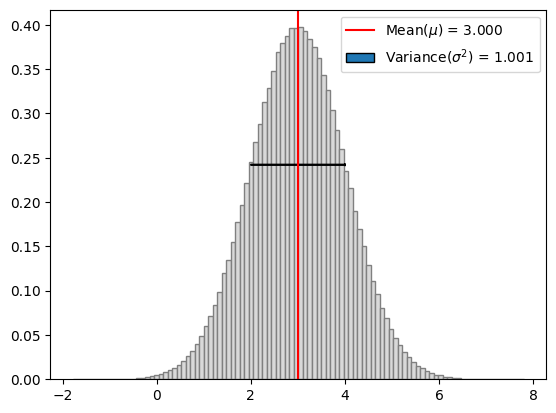

In [72]:
Random_Numbers = np.random.normal(3,1,int(10e5))

def Mean(X: list)->float:
    #Function to calculate the mean of a given set of data

    mean = np.sum(Random_Numbers)/len(Random_Numbers)

    return mean

def Variance(X: list, Mean)->float:
    #function to calculate the variance of a given set of data

    mean = Mean(X)
    difference = np.zeros_like(X)
    for i in range(len(X)):
        difference[i] = (X[i]-mean)**2  
    variance = np.sum(difference)/(len(X))

    return variance

x = 2
mean, variance = Mean(Random_Numbers), Variance(Random_Numbers, Mean)
normal = 1/np.sqrt(2*np.pi*variance) * np.exp(-0.5*((x-mean)/variance)**2)

print('The Mean of the given Random numbers is {:.3f} and the Variance is {:0.3f}.'.format(mean,variance))

#For plotting
plt.hist(Random_Numbers, color='.85', density=True, bins=100, edgecolor='grey')
plt.axvline(Mean(Random_Numbers), color='red', label=r'Mean($\mu$) = {:.3f}'.format(mean))
plt.arrow(x,normal, 2*abs(x-mean), 0, label= r'Variance($\sigma^2$) = {:0.3f}'.format(variance))
plt.legend(loc='best')
plt.show()   

#### Question 12. 
Create N number of uniform random numbers between [0, 1] as $X = x_0, x_1, ..., x_{N−1}$. Transform these numbers with the rule Y = g(X) for each member of X to obtain the set of numbers $Y = y_0, y_1, ..., y_{N−1}$. Perform the below tasks\
(a) Get the histogram plot of Y\
(b) Obtain the probability distribution of Y using program-4. with proper dx. Plot this probability
distribution (Not histogram plot).

lamda = 0.5


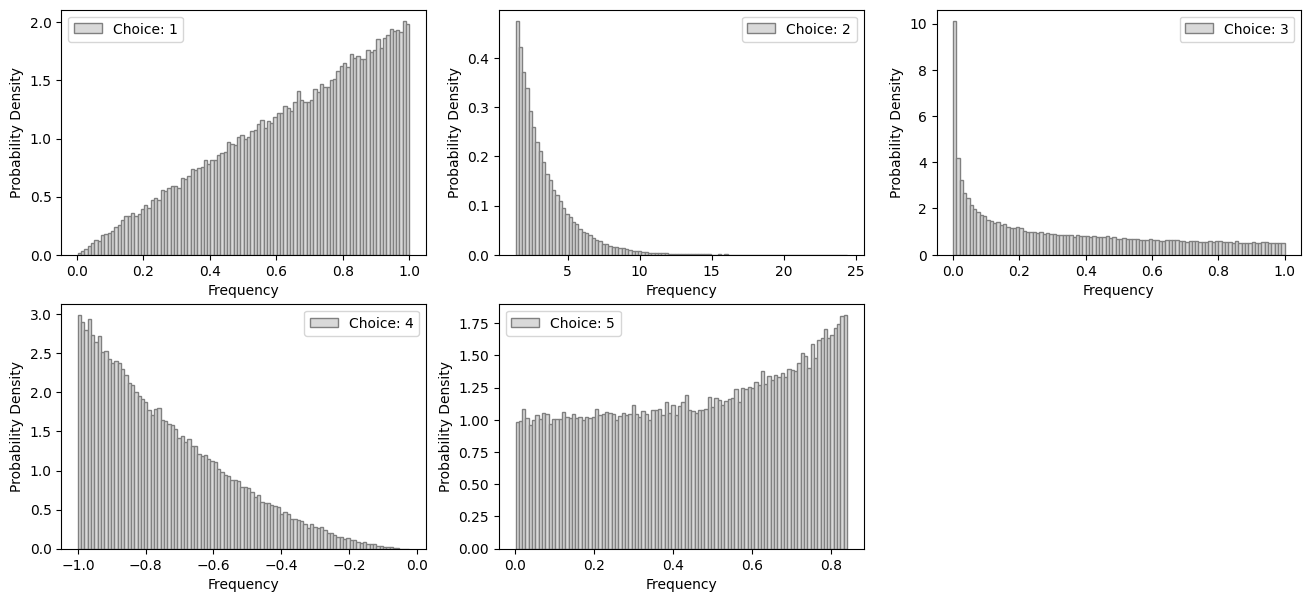

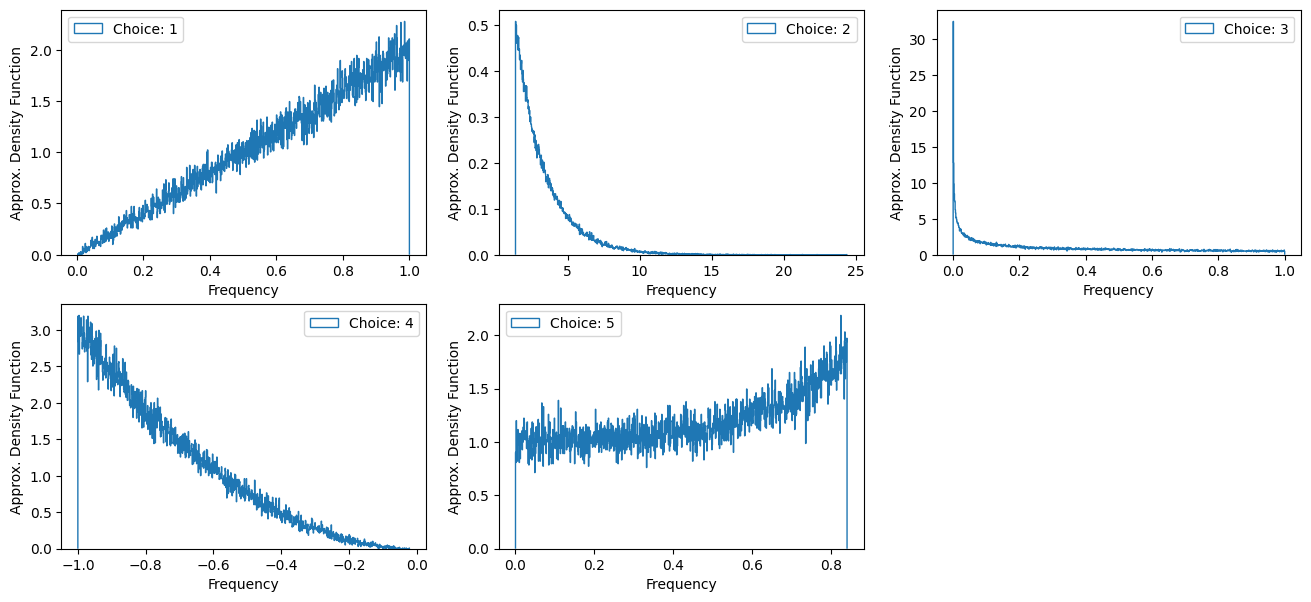

In [121]:
N = np.random.uniform(0,1,100000)

def G(X: list, choice: int, **parameters) -> list:
    #Mathematical Functions

    if choice == 1:
        return np.sqrt(X)
    
    elif choice == 2:
        for j, k in parameters.items():
            print("{} = {}".format(j,k))
        j = float(k)
        return -np.log(j*X)/j    

    elif choice == 3:
        return np.square(X)
    
    elif choice == 4:
        return -np.power(X, 1/3)
    
    elif choice == 5:
        return np.sin(X)

Y = np.zeros((5,len(N)), dtype=object)


for i in range(1,6):
    if i == 2:
        Y[i-1] = G(N, i, lamda = 0.5)

        plt.figure(1, figsize=(16,7))
        plt.subplot(2,3,i)
        plt.xlabel('Frequency')
        plt.ylabel('Probability Density')
        plt.hist(Y[i-1,:], bins=100, density=True, color='0.85', edgecolor='grey', label='Choice: {}'.format(i))
        plt.legend(loc='best')

        plt.figure(2, figsize=(16,7))
        plt.subplot(2,3,i)
        plt.xlabel('Frequency')
        plt.ylabel('Approx. Density Function')
        plt.hist(Y[i-1,:], bins=1000, density=True, histtype='step', label='Choice: {}'.format(i))
        plt.legend(loc='best')

    else:    
        Y[i-1] = G(N, i)
        plt.figure(1, figsize=(16,7))
        plt.subplot(2,3,i)
        plt.xlabel('Frequency')
        plt.ylabel('Probability Density')
        plt.hist(Y[i-1,:], bins=100, density=True, color='0.85', edgecolor='grey', label='Choice: {}'.format(i))
        plt.legend(loc='best')

        plt.figure(2, figsize=(16,7))
        plt.subplot(2,3,i)
        plt.xlabel('Frequency')
        plt.ylabel('Approx. Density Function')
        plt.hist(Y[i-1,:], bins=1000, density=True, histtype='step', label='Choice: {}'.format(i))
        plt.legend(loc='best')

plt.show()